In [11]:
# libraries
# ==================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# ==================================

**Read 'Boston Housing' dataset**

In [12]:
df = pd.read_csv('./datasets/boston_housing.csv')
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [13]:
X = df.drop('MEDV', axis=1).values # features
y = df['MEDV'].values # target

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Manual Implementation

In [14]:
def compute_cost(X, y, weights, bias) -> float:
    '''Computes the Mean Squared Error (MSE) cost for linear regression.'''
    n_samples = len(X)
    y_pred = X.dot(weights) + bias
    cost = (1 / n_samples) * np.sum((y_pred - y) ** 2) # MSE formula: 1/N * sum((y_pred - y)^2)
    return cost

def compute_gradients(X, y, weights, bias):
    '''Computes the gradients of the cost function with respect to weights and bias.'''
    n_samples = len(X)
    y_pred = X.dot(weights) + bias
    dw = (2 / n_samples) * X.T.dot(y_pred - y) # dMSE/dw = (2/N) * X^T * (y_pred - y)
    db = (2 / n_samples) * np.sum(y_pred - y) # dMSE/db = (2/N) * sum(y_pred - y)
    return dw, db

def stochastic_gradient_descent(X, y, learning_rate=0.001, n_iterations=1000, batch_size=1):
    '''Performs mini-batch stochastic gradient descent to learn weights and bias in linear regression.'''
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0
    costs = []
    weights_history = []

    for it in range(n_iterations):
        # shuffle data
        indices = np.random.permutation(n_samples)
        X = X[indices]
        y = y[indices]

        # mini-batch stochastic gradient descent
        for i in range(0, n_samples, batch_size):
            X_i = X[i:i + batch_size]
            y_i = y[i:i + batch_size]

            # compute gradients
            dw, db = compute_gradients(X_i, y_i, weights, bias)

            # update parameters
            weights -= learning_rate * dw
            bias -= learning_rate * db

        # calculate cost
        cost = compute_cost(X, y, weights, bias)
        costs.append(cost)
        weights_history.append(weights)

    
    return weights, bias, costs, weights_history

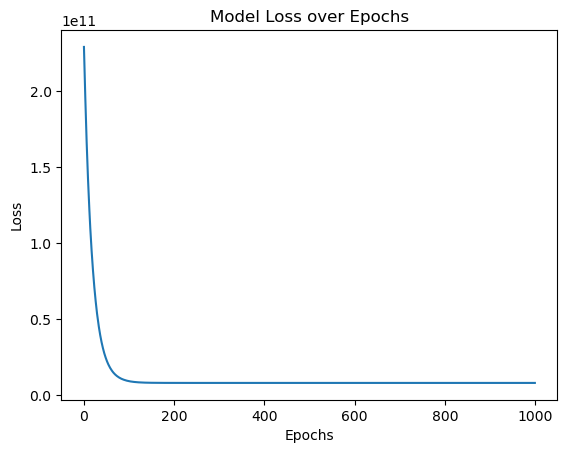

In [15]:
# train model and get parameters
weights, bias, costs, weights_history = stochastic_gradient_descent(X_train_scaled, y_train, batch_size=32)

# plot graph of costs vs iterations
plt.plot(costs)
plt.title('Model Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [16]:
# print final parameters
print("Final weights: ", weights_history[-1])
print("Final bias: ", bias)
print("Final cost: ", costs[-1])

Final weights:  [ 58463.03327401 -75361.06145185 -41946.15882176]
Final bias:  461730.83997044194
Final cost:  7950071815.510456


## Keras Implementation

In [17]:
# same parameters as above
learning_rate = 0.001
n_iterations = 1000
batch_size = 32


# create Keras model
model = Sequential([
    Dense(1, input_shape=(X_train_scaled.shape[1],), activation='linear')
])

# create a custom SGD optimizer with a specified learning rate to match our manual implementation
learning_rate = 0.001
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

# compile model with the custom optimizer
model.compile(optimizer=optimizer, loss='mean_squared_error')

# train model
history = model.fit(X_train_scaled, y_train, epochs=n_iterations, batch_size=batch_size, verbose=1)

# evaluate model
loss = model.evaluate(X_test_scaled, y_test, verbose=1)

# extract weights and biases
weights, bias = model.layers[0].get_weights()

Epoch 1/1000
13/13 [==============================] - 0s 1ms/step - loss: 236048973824.0000
Epoch 2/1000
13/13 [==============================] - 0s 2ms/step - loss: 223494864896.0000
Epoch 3/1000
13/13 [==============================] - 0s 2ms/step - loss: 211755778048.0000
Epoch 4/1000
13/13 [==============================] - 0s 2ms/step - loss: 200801419264.0000
Epoch 5/1000
13/13 [==============================] - 0s 2ms/step - loss: 190504058880.0000
Epoch 6/1000
13/13 [==============================] - 0s 2ms/step - loss: 180623360000.0000
Epoch 7/1000
13/13 [==============================] - 0s 2ms/step - loss: 171615092736.0000
Epoch 8/1000
13/13 [==============================] - 0s 2ms/step - loss: 162781773824.0000
Epoch 9/1000
13/13 [==============================] - 0s 2ms/step - loss: 154455523328.0000
Epoch 10/1000
13/13 [==============================] - 0s 2ms/step - loss: 146797772800.0000
Epoch 11/1000
13/13 [==============================] - 0s 2ms/step - loss: 1393

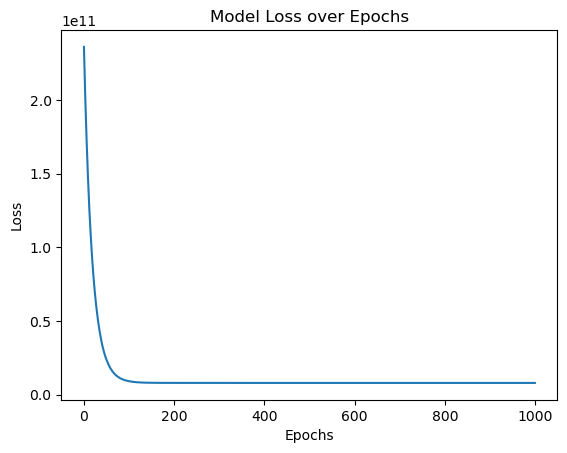

In [18]:
# plot the loss
plt.plot(history.history['loss'])
plt.title('Model Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [19]:
# print final parameters
print("Final weights:", weights.flatten())
print("Final bias:", bias)
print("Final cost:", loss)

Final weights: [ 58691.043 -76160.625 -41943.457]
Final bias: [461568.5]
Final cost: 6776816128.0
